##Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.
Questions For Investigation

###References:
Statistical References:
>    https://en.wikipedia.org/wiki/Student%27s_t-test
>    https://en.wikipedia.org/wiki/Student%27s_t-test#Paired_samples
>    https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples
>    https://en.wikipedia.org/wiki/Stroop_effect#Theories

Programing References:
>    http://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-inline-matplotlib-graphics
    http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
    http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html
    http://matplotlib.org/api/pyplot_api.html
    http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.probplot.html
    http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_1samp.html


###1. What is our independent variable? What is our dependent variable?

The independent variable is whether or not the words are congruent.
The dependent variable is the time it takes to name the ink colors.


###2. What is an appropriate set of hypotheses for this task?
The null hypothesis is that the difference between each subject's congruent (µ<sub>1</sub>) and incongruent (µ<sub>2</sub>) tests will not be significant.
$$ µ_{∆} = µ_{2} - µ_{1} $$
$$ H_{0}: µ_{∆} = 0 $$
The alternative hypothesis is that the difference between each subject's congruent and incongruent tests will be significant.
$$ H_{A}: µ_{∆} \neq 0 $$
####What kind of statistical test do you expect to perform? Justify your choices.
I expect to perform the dependent t-test for paired samples since the two samples are paired. The samples are paired since each subject does both tests, which means we know the difference in each subjects scores.
In order to use this test the data needs to be normally distributed.

ref: https://en.wikipedia.org/wiki/Student%27s_t-test#Paired_samples
     https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples

###Personal Stroop times
Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

####Personal Results
    Congruent: 13.847
    Incongruent: 30.938

###3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
# http://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-inline-matplotlib-graphics
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot, ttest_1samp

np.set_printoptions(suppress=True)

data = pd.read_csv('congruent-vs-incongruent.csv')
data['delta'] = data['Incongruent'] - data['Congruent']
congru = data['Congruent']
incon = data['Incongruent']
delta = data['delta']
data.head(3)

,Congruent,Incongruent,delta
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650


In [2]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

data.describe() 

,Congruent,Incongruent,delta
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


We can see that means are very close to two standard deviations apart. This is a good sign.
Note that the std returned is Normalized using n-1.

The median and mean are also relatively close for each sample, meaning there is a possiblity that they are normaly distributed.

###4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

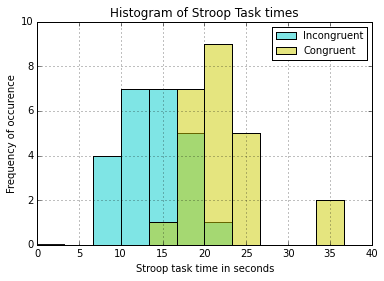

note: green represents where the Congruent and Incongruent plots overlap


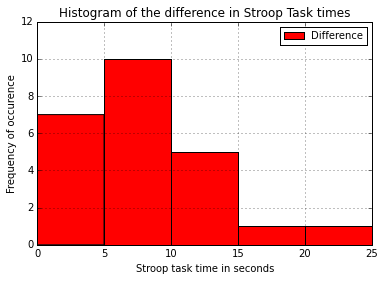

In [3]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html
# http://matplotlib.org/api/pyplot_api.html

plt.figure()
congru.hist(color=(0, 0.8, 0.8, 0.5), bins=12, range=(0,40), label='Incongruent', stacked=False)
incon.hist(color=(0.8, 0.8, 0, 0.5), bins=12, range=(0,40), label='Congruent', stacked=False)
plt.ylim((0,10))
plt.legend(prop={'size': 10})
plt.xlabel('Stroop task time in seconds')
plt.ylabel('Frequency of occurence')
plt.title('Histogram of Stroop Task times')
plt.show()
plt.close()
print('note: green represents where the Congruent and Incongruent plots overlap')

plt.figure()
delta.hist(color='red', bins=5, range=(0,25), label='Difference', stacked=False)
plt.ylim((0,12))
plt.legend(prop={'size': 10})
plt.xlabel('Stroop task time in seconds')
plt.ylabel('Frequency of occurence')
plt.title('Histogram of the difference in Stroop Task times')
plt.show()
plt.close()


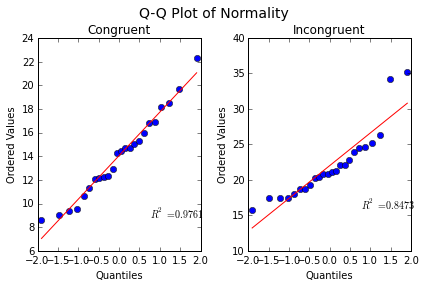

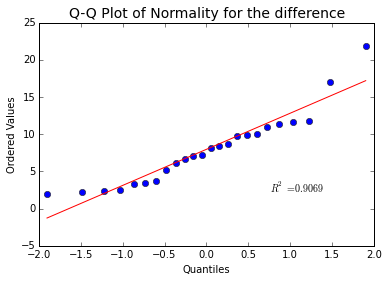

In [4]:
# http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.probplot.html
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

array = probplot(congru, plot=ax1)
array = probplot(incon, plot=ax2)

fig.suptitle('Q-Q Plot of Normality', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.87)
ax1.set_title('Congruent')
ax2.set_title('Incongruent')
plt.show()
plt.close()

# plot of the difference
plt.figure()
array = probplot(delta, plot=plt)
plt.title('Q-Q Plot of Normality for the difference', fontsize=14)
plt.show()
plt.close()

Based on the Histogram and QQ plots the sampling distributions of both samples and the difference appear normal.

###5. Now, perform the statistical test and report your results.

In [5]:
# http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp
degrees_of_freedom = delta.count()-1
ttest_stat, ttest_p = ttest_1samp(delta, popmean=0)
print('degrees of freedom: '+str(degrees_of_freedom))
print('tt statistic: '+str(ttest_stat))
print('p value: '+str(ttest_p))

degrees of freedom: 23
tt statistic: 8.02070694411
p value: 4.10300058571e-08


####What is your confidence level and your critical statistic value?
My confidence level is 99.9% with a critical value of ±3.768.

####Do you reject the null hypothesis or fail to reject it?
We reject the null hypothesis.

####Come to a conclusion in terms of the experiment task.
We conclude that the incongruent task takes longer than the congruent task.

####Did the results match up with your expectations?
These results mached my initial expectations of the data.

###6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

There is a trick we used to play on adults when I was a kid. We would tell them to say toast really quickly a whole bunch of times and then ask them what goes into a toaster. Without fail they would respond "TOAST!!!", then a few seconds later recant, saying "No, wait, I mean bread."

One possible explanation is that optics and linguistics are processed in different parts of the brain and since we are asking for a linguistic response to a optical question the linguistics centre has to wait .

Another possible and less complicated answer is that because the decision centre is receiving data from two places that contradict eachother it takes more time for it to figure out which one is right.

ref: https://en.wikipedia.org/wiki/Stroop_effect#Theories